In [1]:
import pandas as pd
import boost_histogram as bh
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
default_cycler = (cycler(color=['r', 'y', 'g', 'b', 'k']))
plt.rc('axes', prop_cycle=default_cycler)

In [3]:
skhep = pd.read_csv("scikit-hep-20180101-20250101.csv", usecols=["timestamp", "file_project", "details_python"], parse_dates=["timestamp"], dtype={"file_project": "category", "details_python": "category"})
skhep.dropna(inplace=True) # Drop 11 NA's for Python version

In [4]:
hist = bh.Histogram(
    bh.axis.StrCategory(list(set(skhep.file_project))),
    bh.axis.IntCategory([27, 35, 36, 37, 38]),
    bh.axis.Regular(12*2 + 5, int(pd.to_datetime('2018-01-01').asm8), int(pd.to_datetime('2020-06-01').asm8)),
    storage=bh.storage.Int64()
)

In [5]:
%%time
_ = hist.fill(
    np.asarray(skhep.file_project, dtype=str),
    np.asarray(skhep.details_python.str[0:3].astype(float)*10),
    np.asarray(skhep.timestamp, dtype=int),
)

CPU times: user 1.43 s, sys: 138 ms, total: 1.57 s
Wall time: 1.57 s


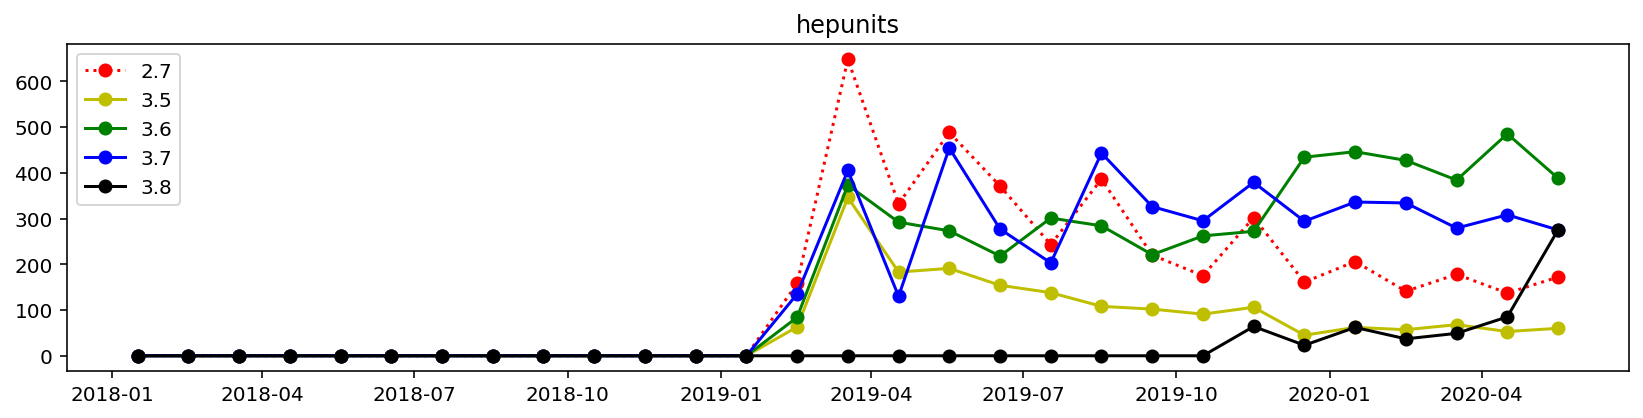

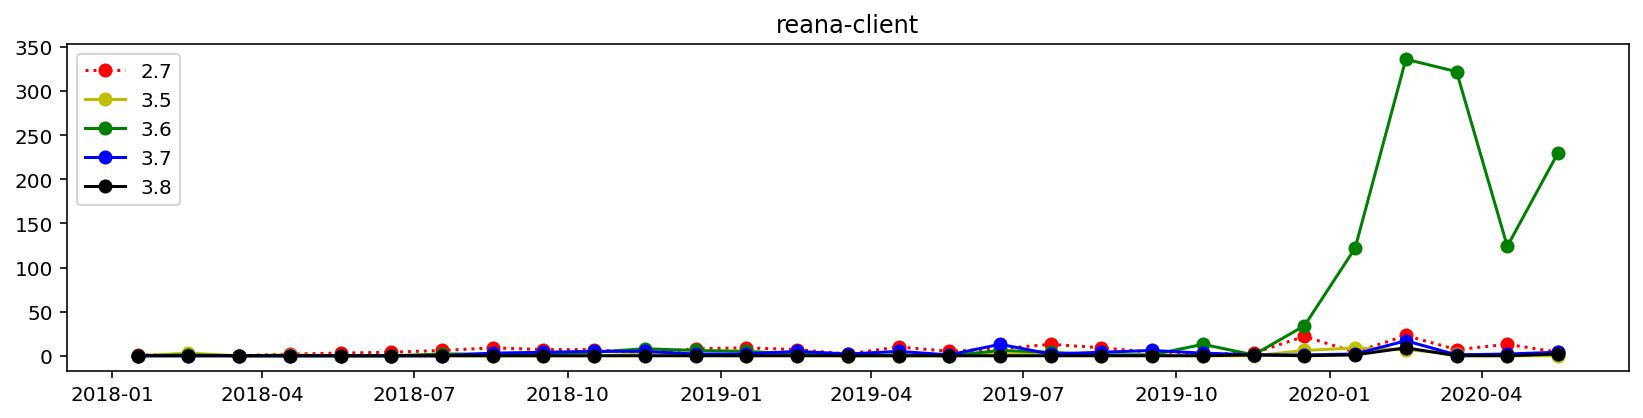

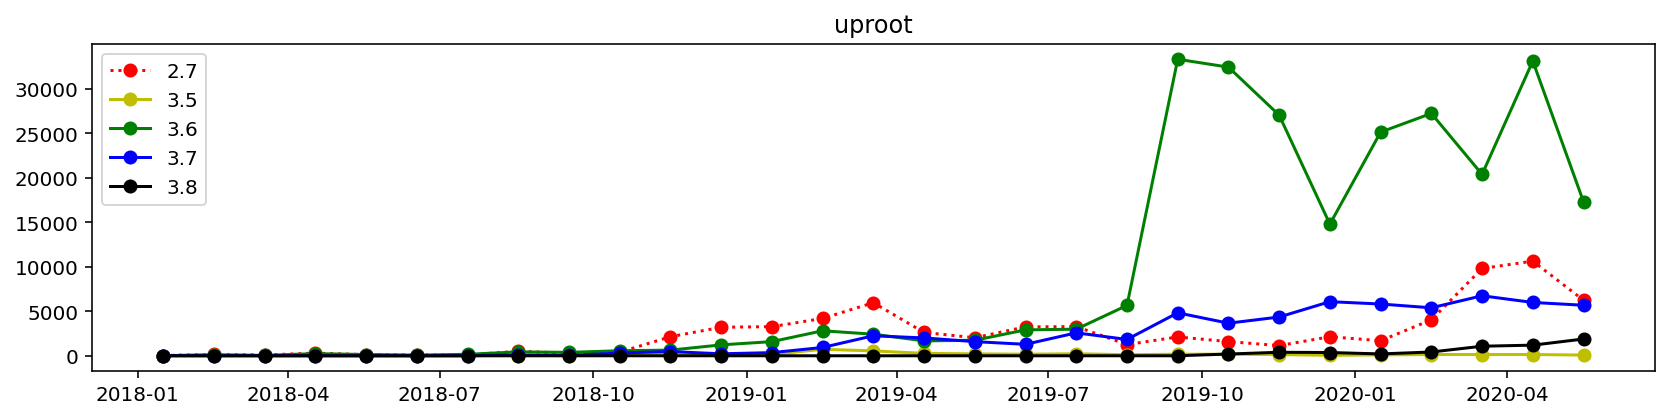

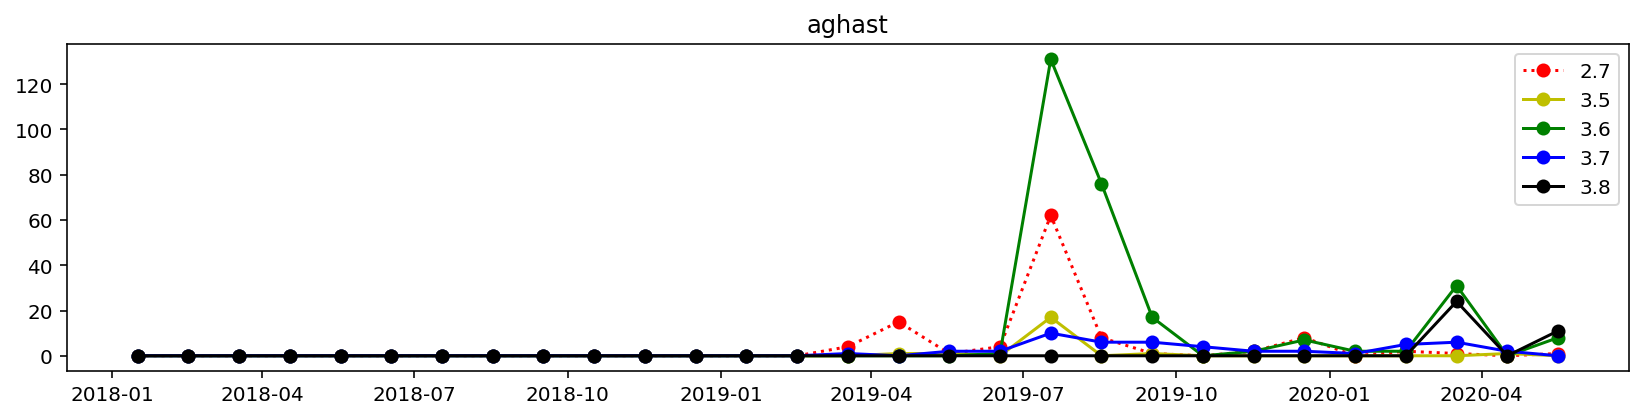

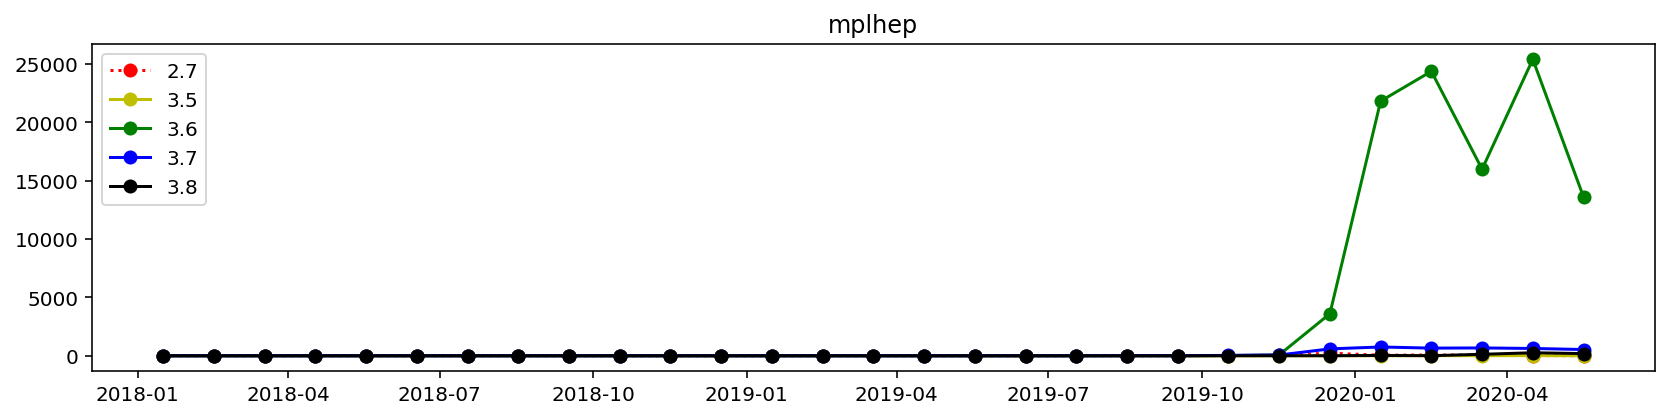

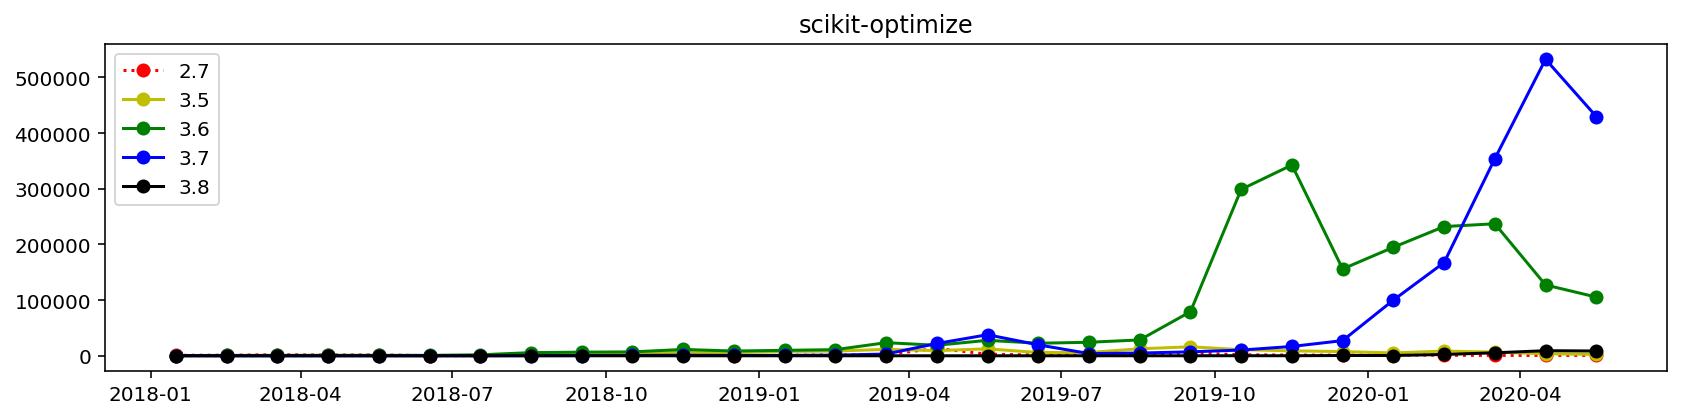

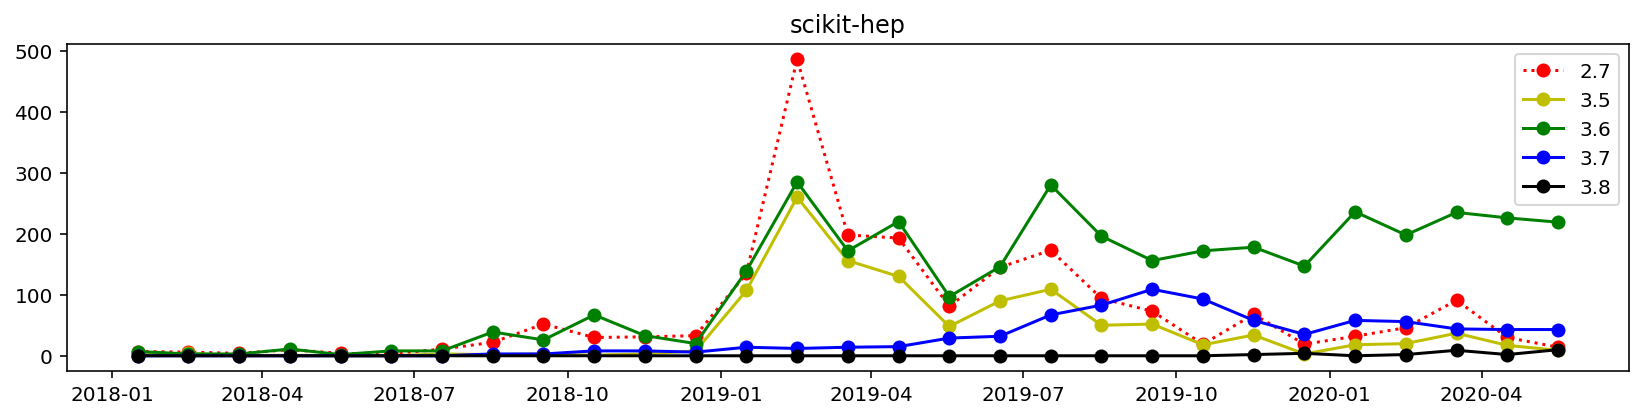

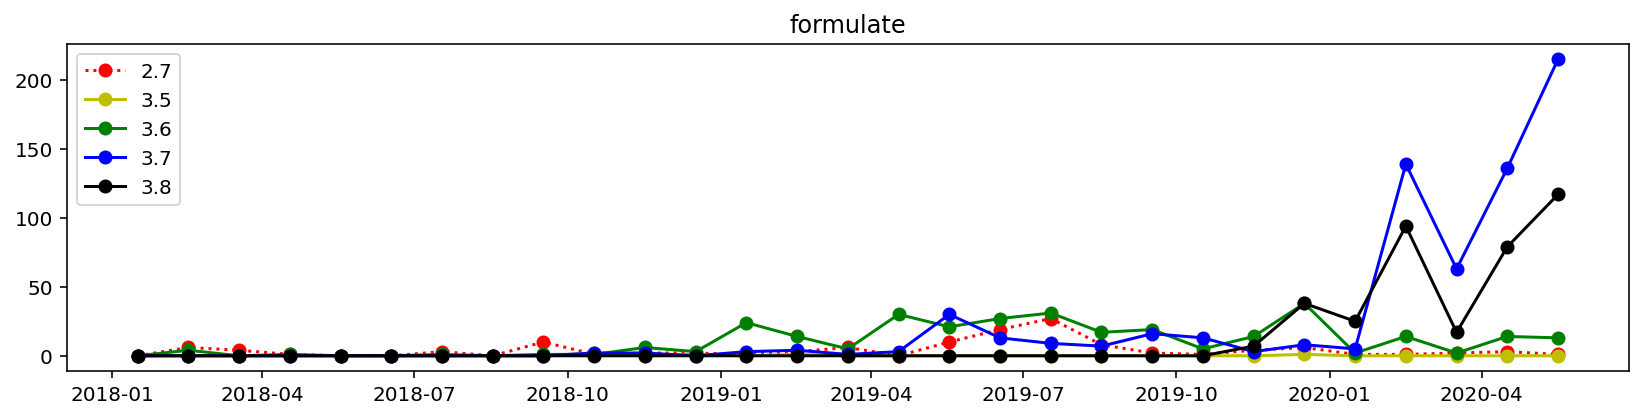

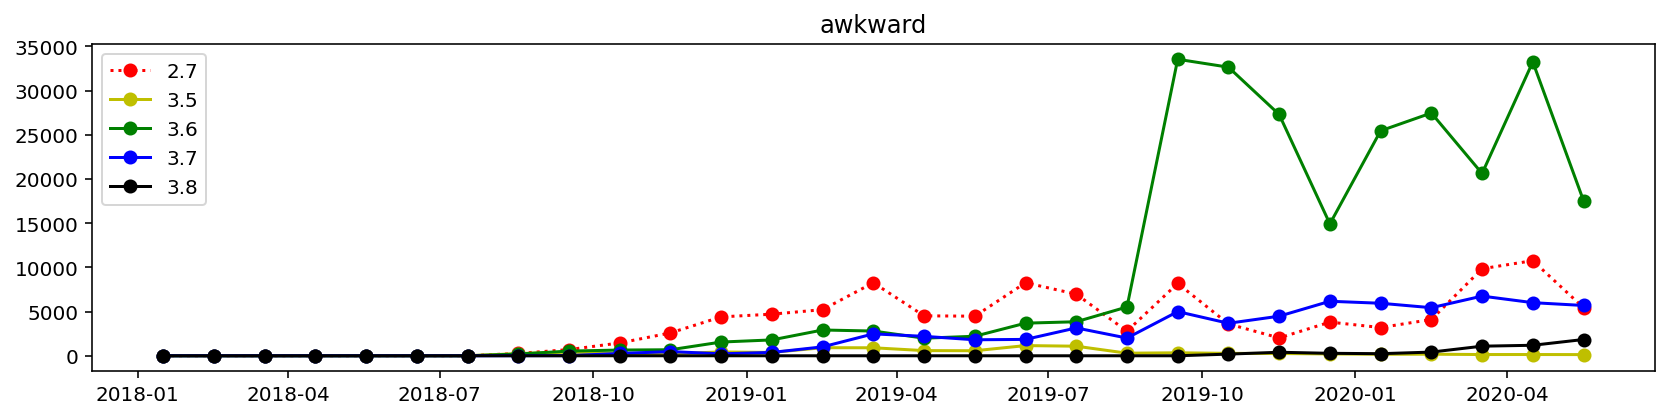

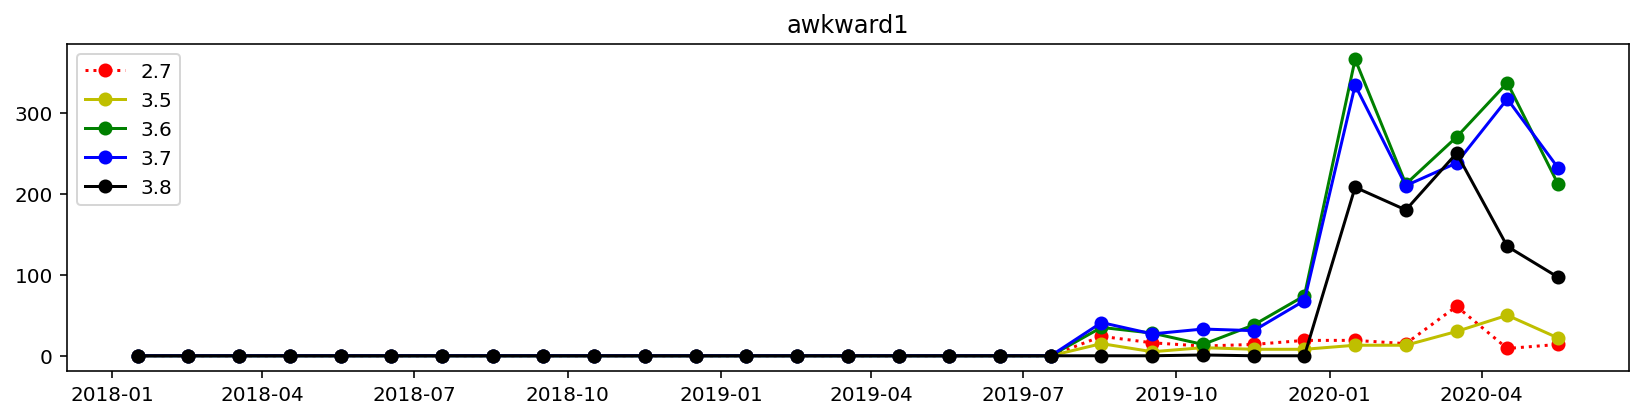

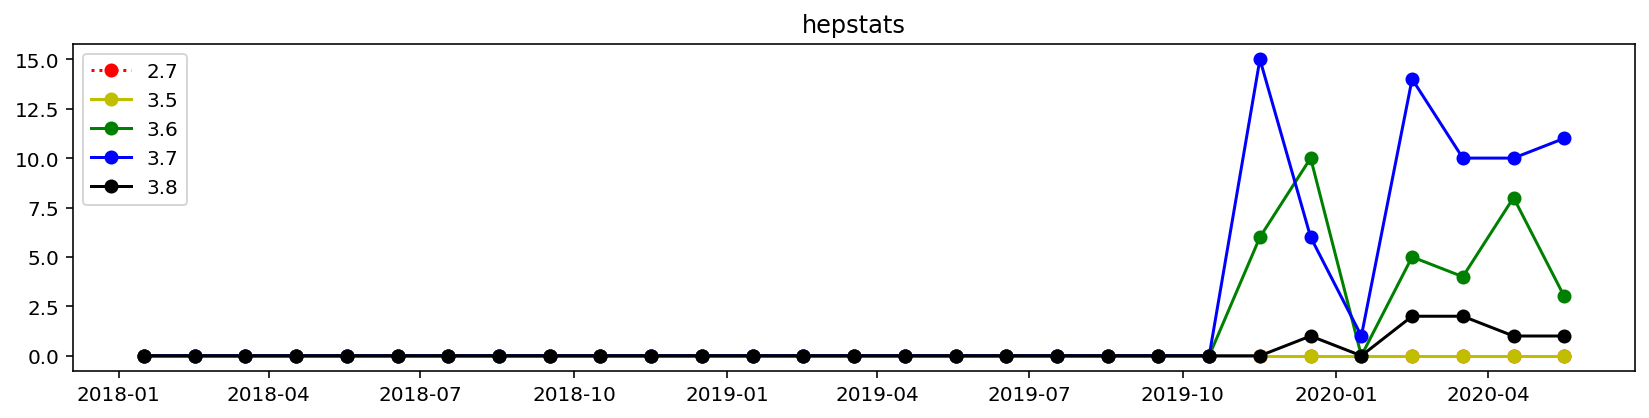

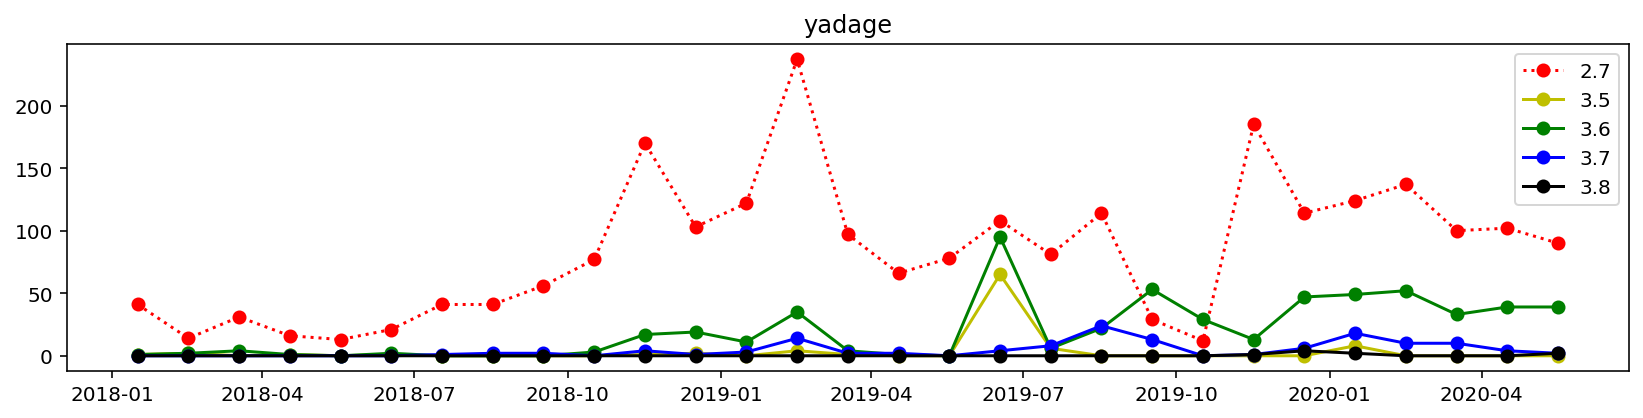

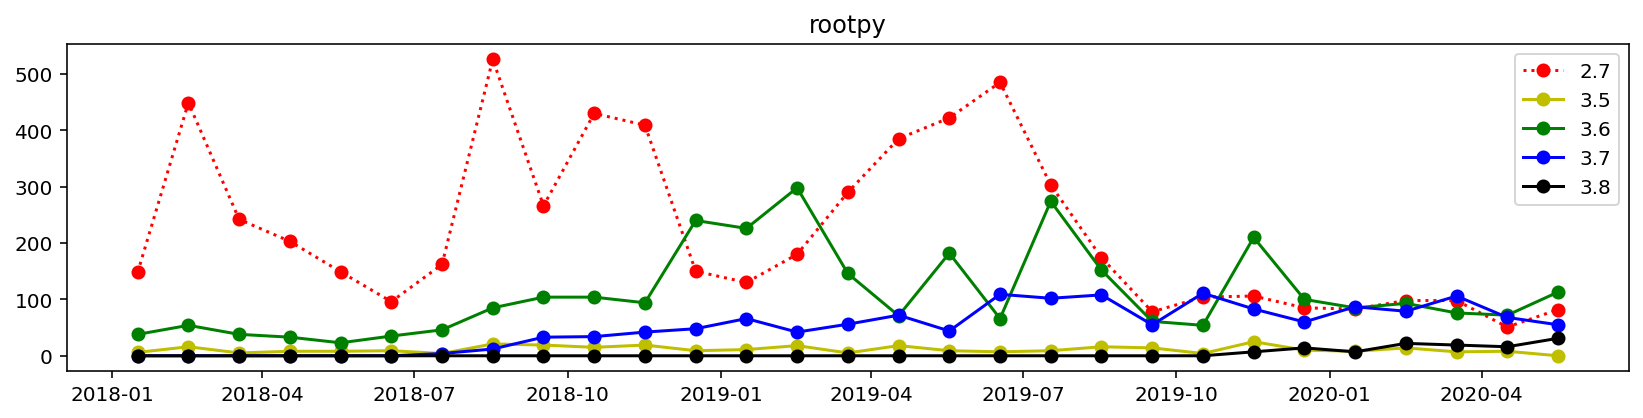

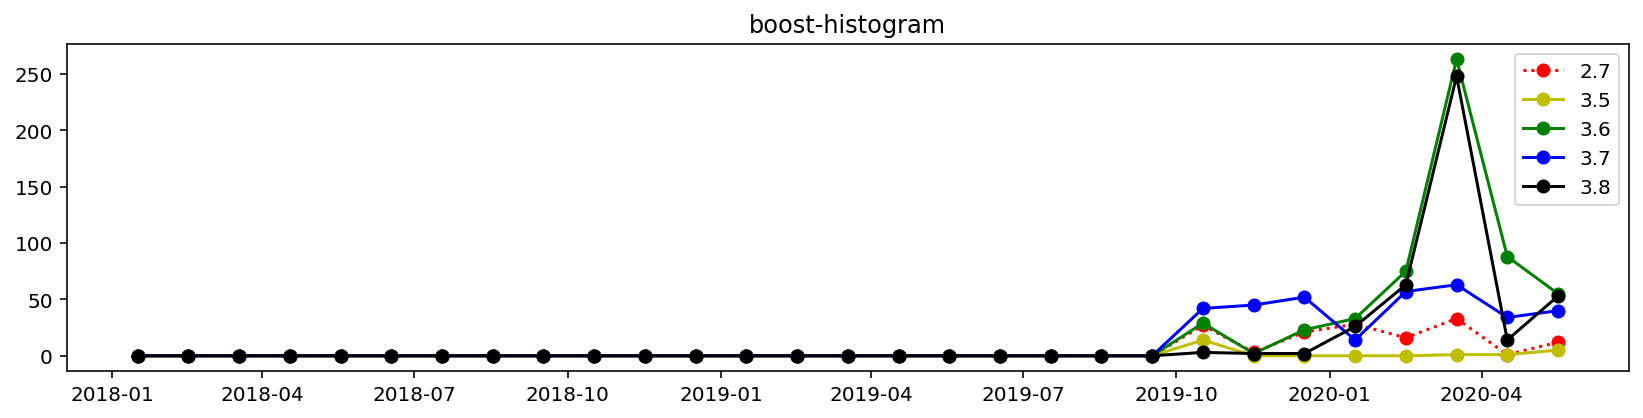

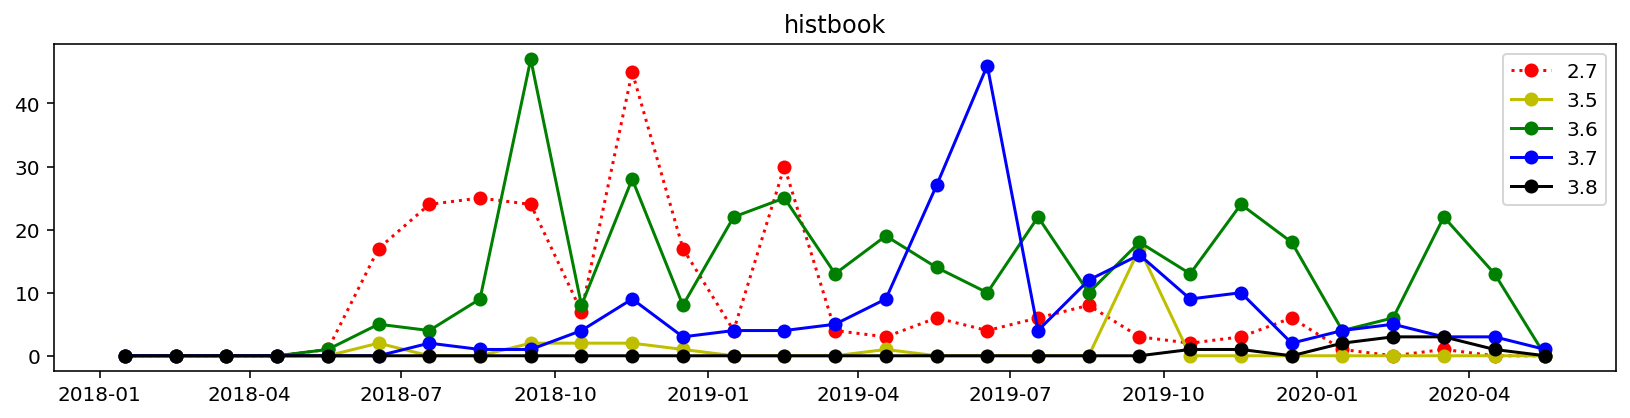

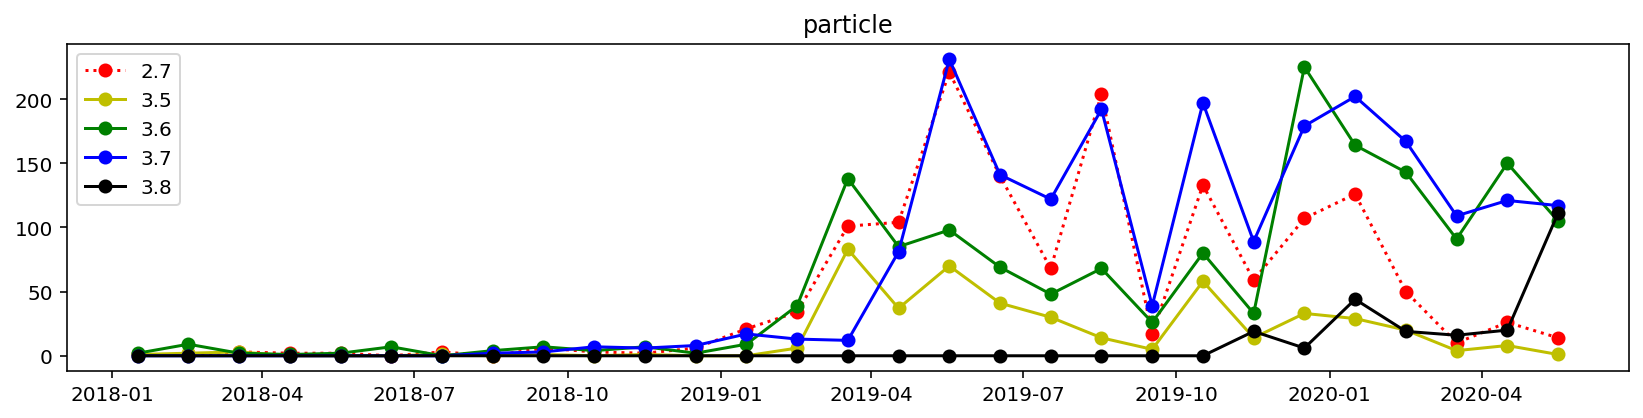

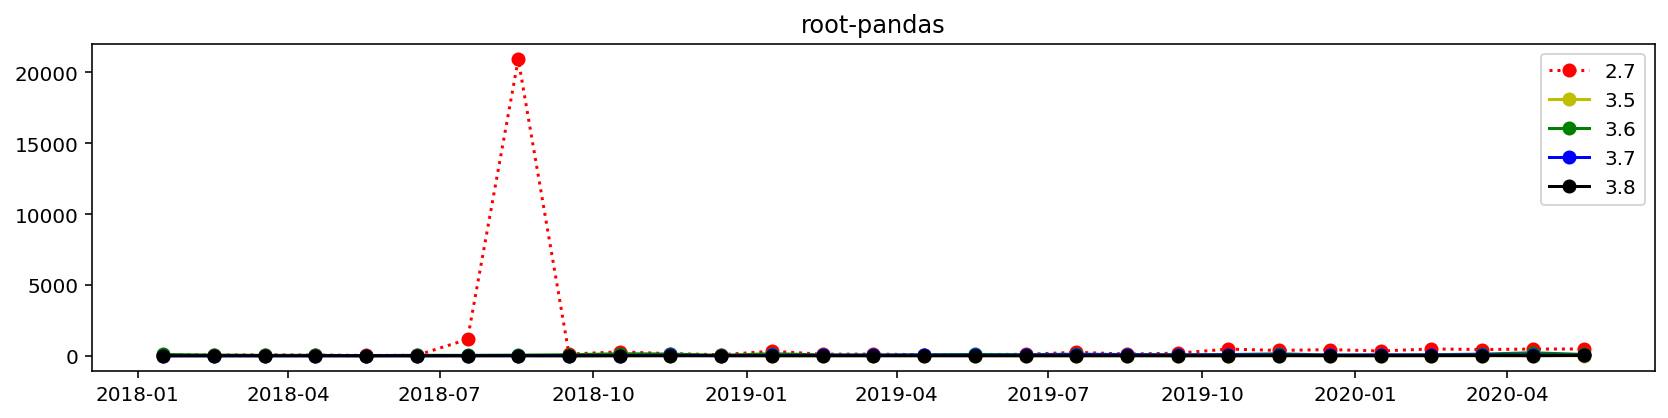

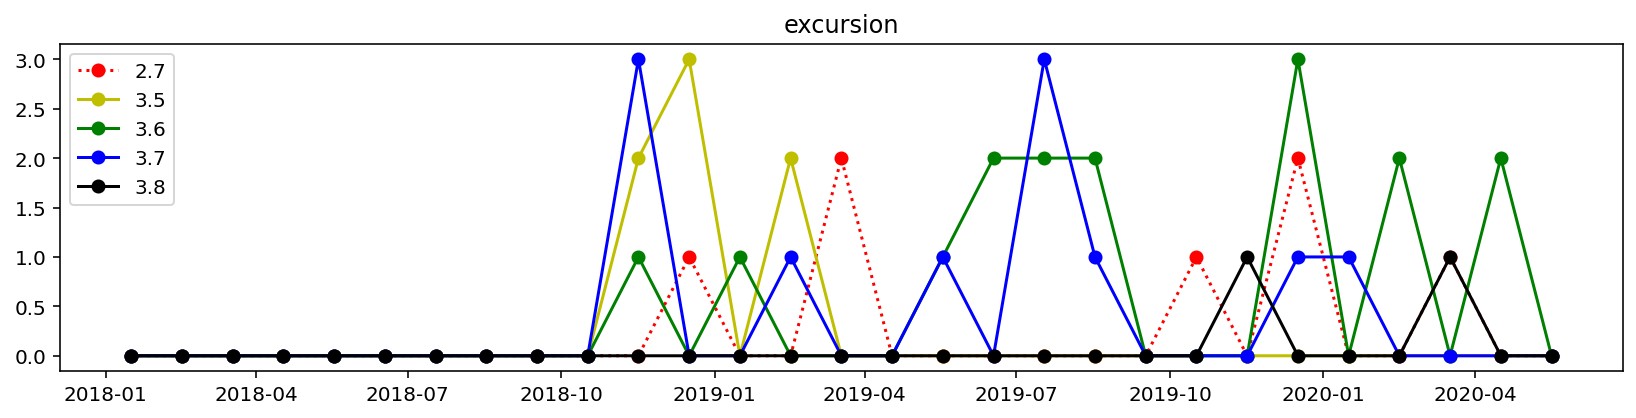

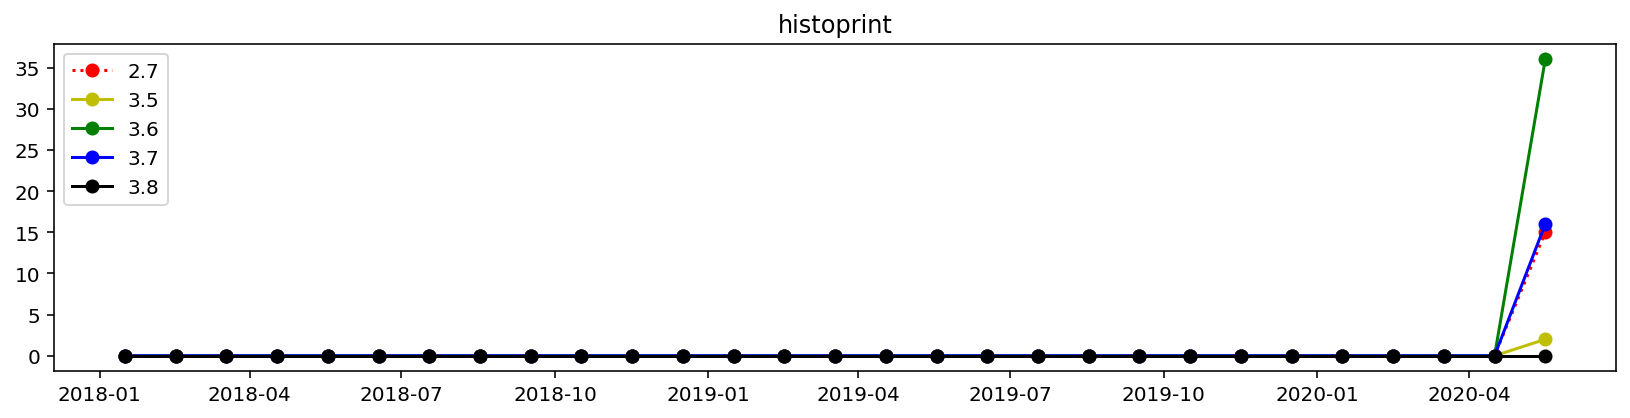

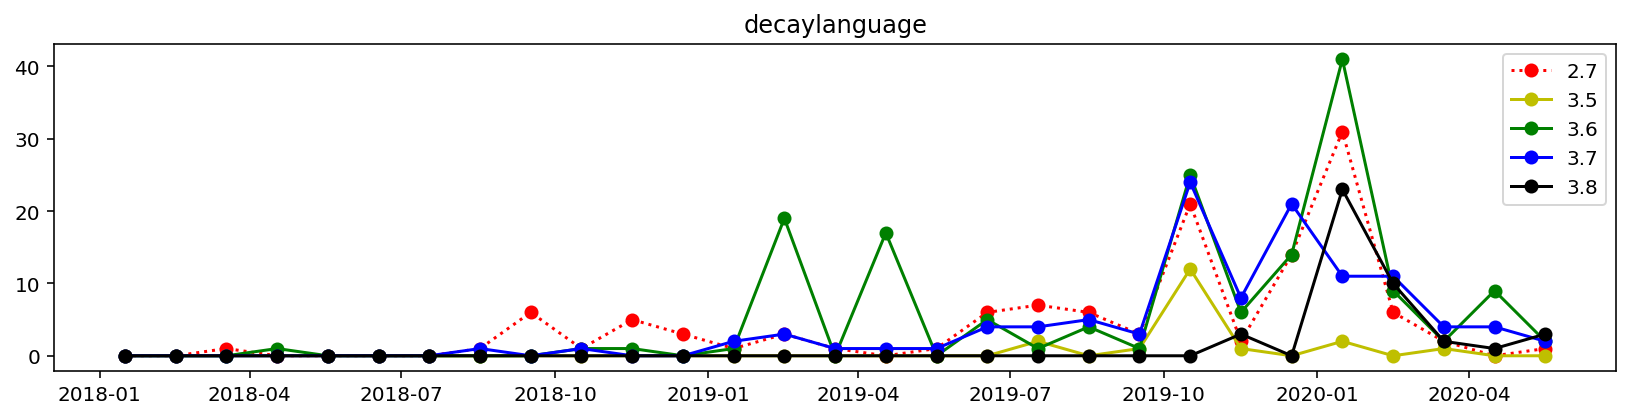

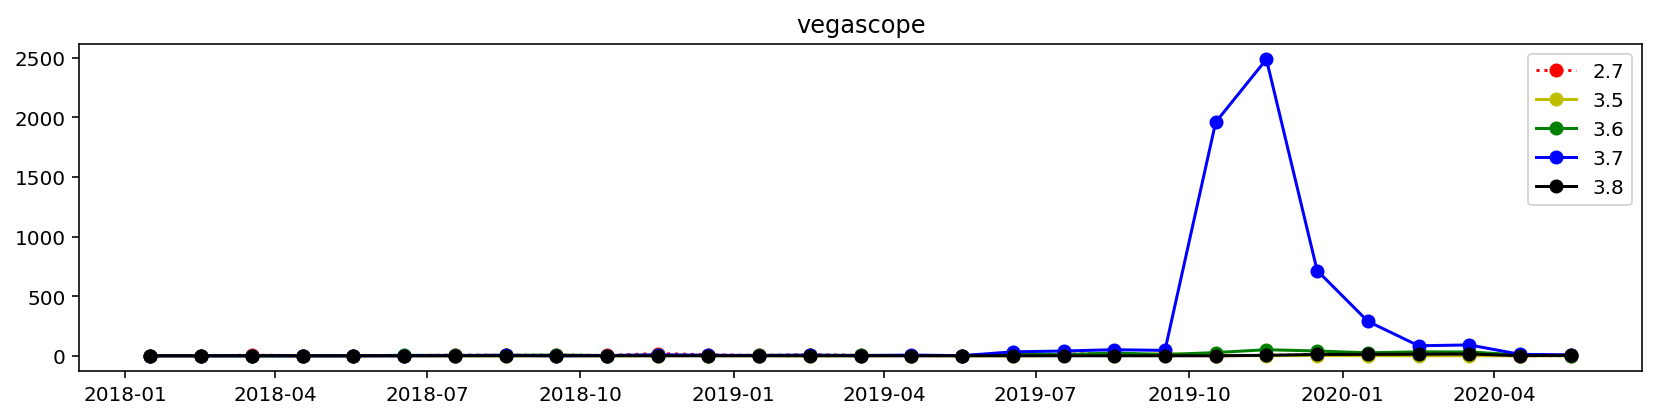

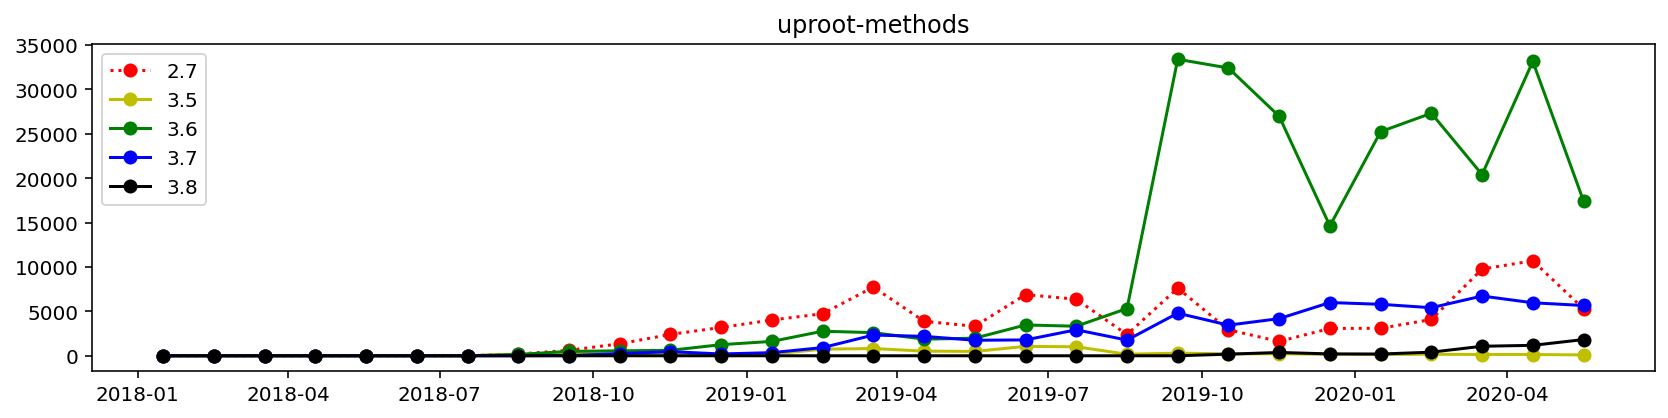

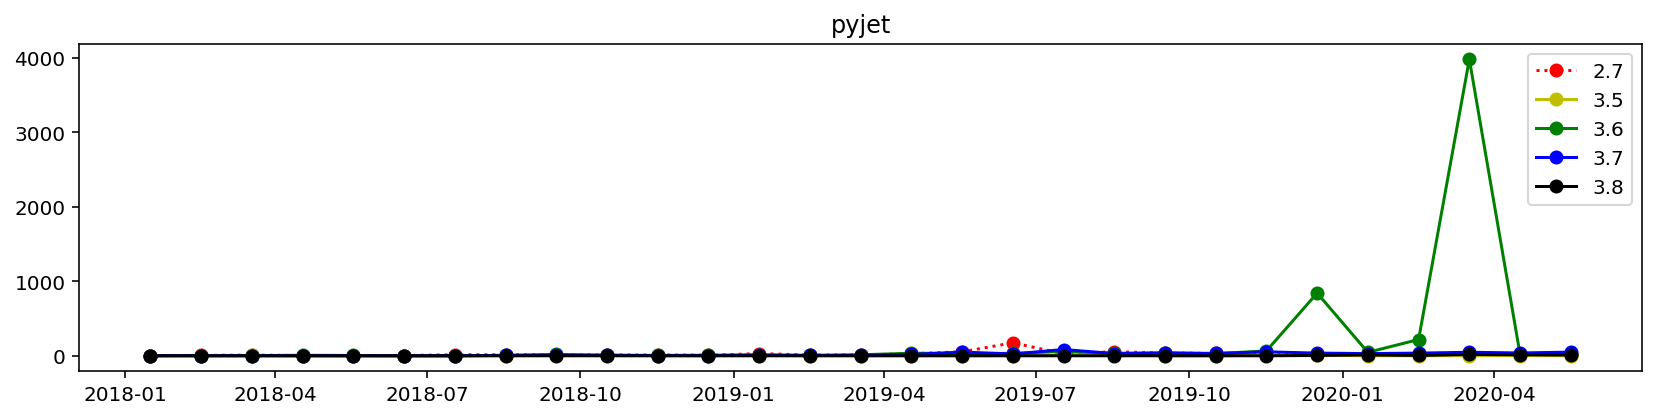

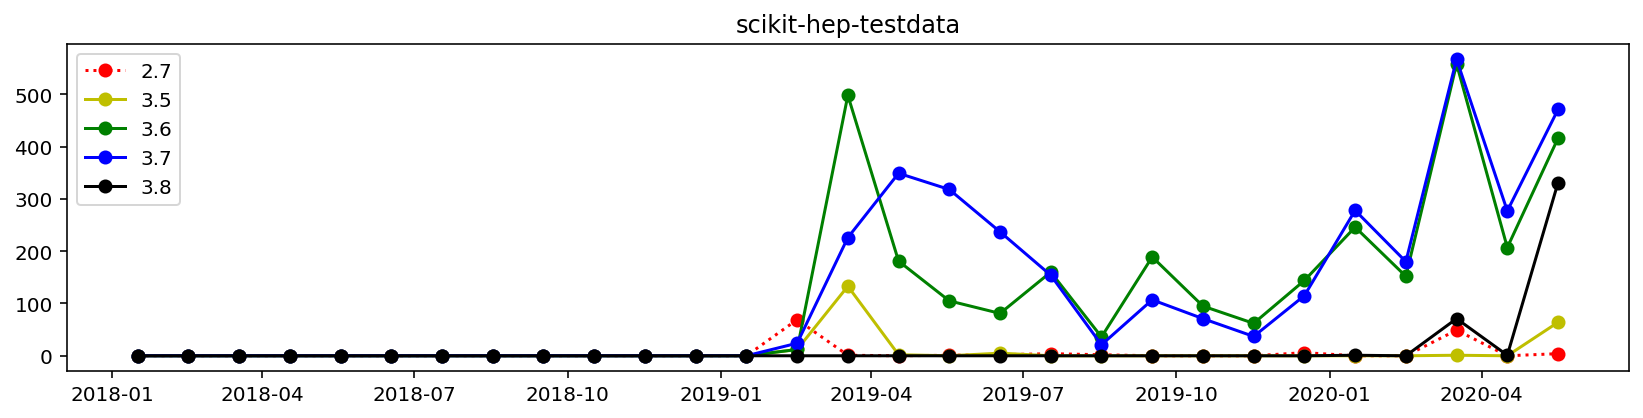

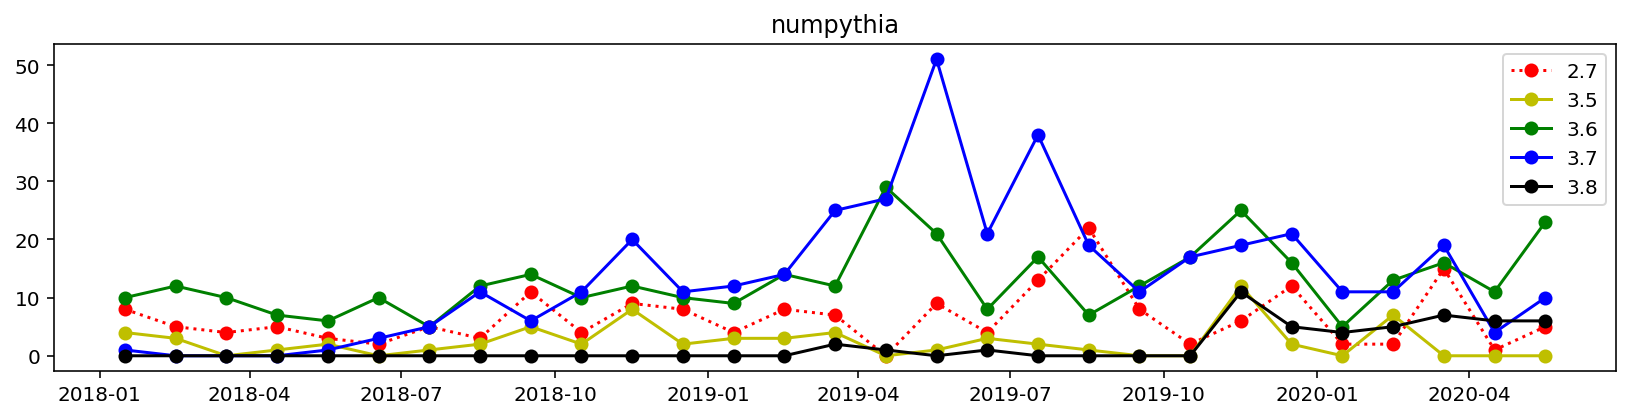

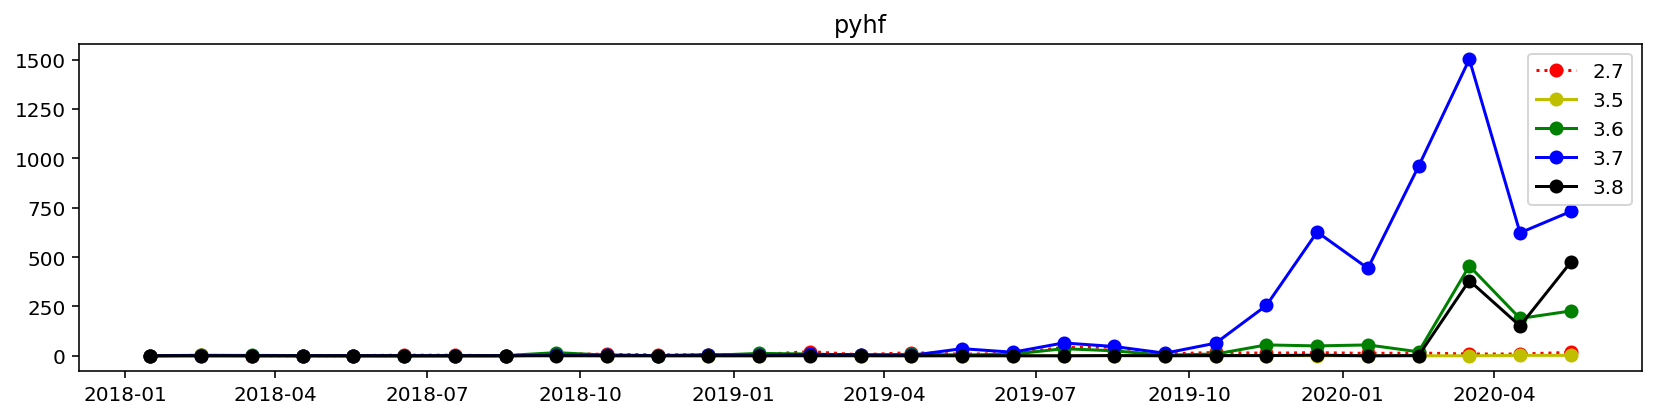

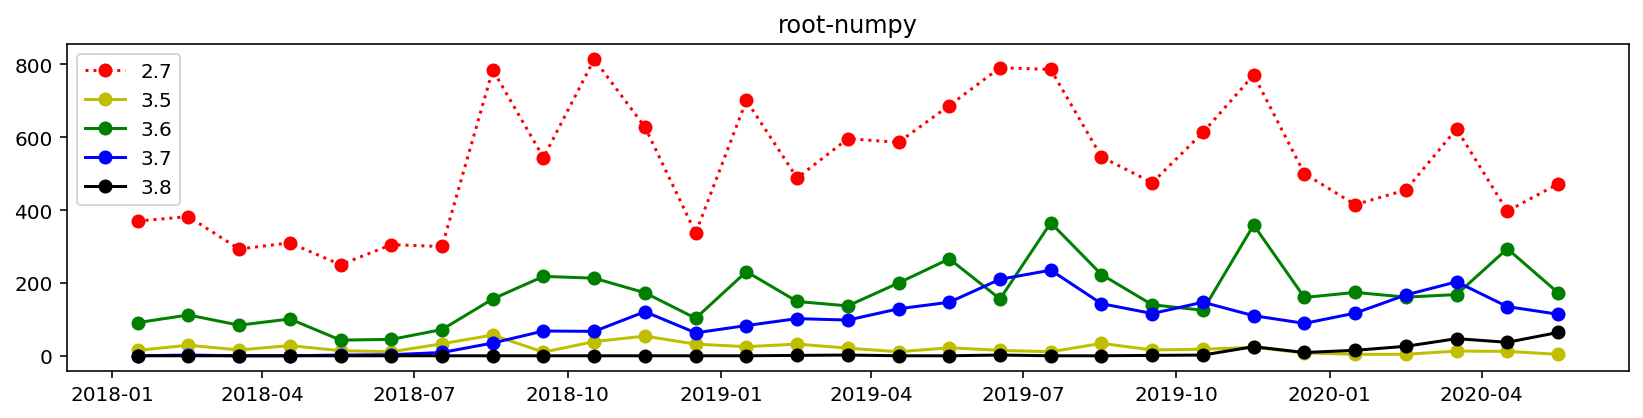

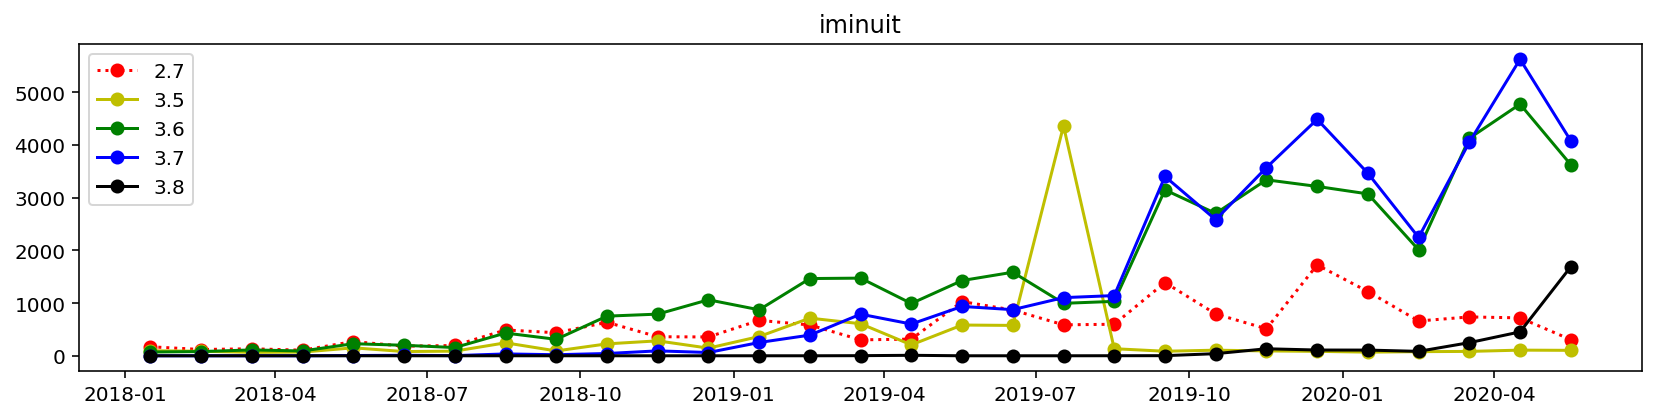

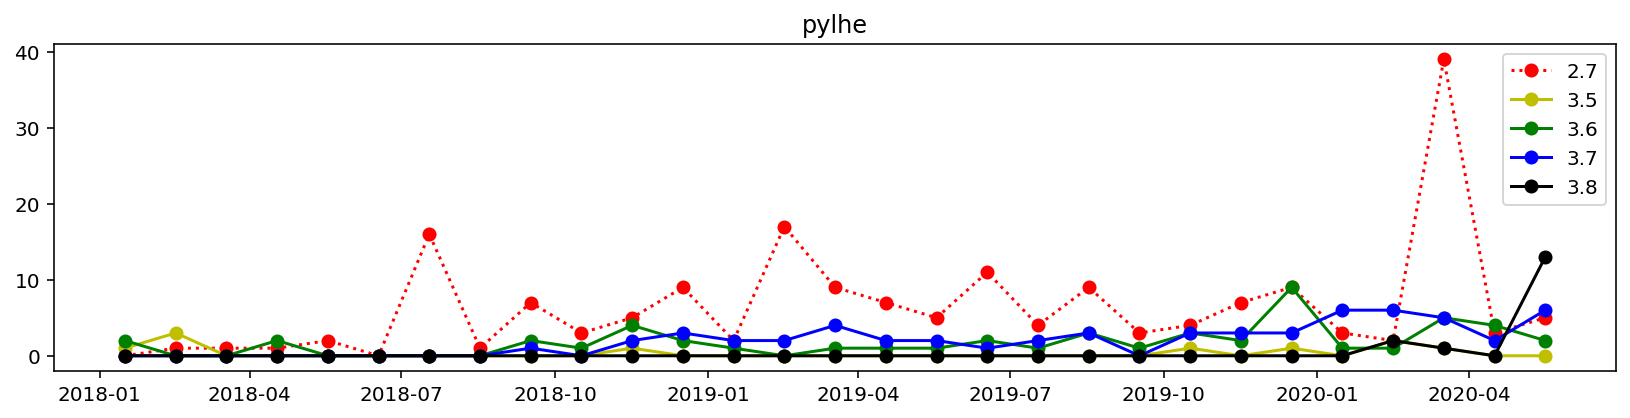

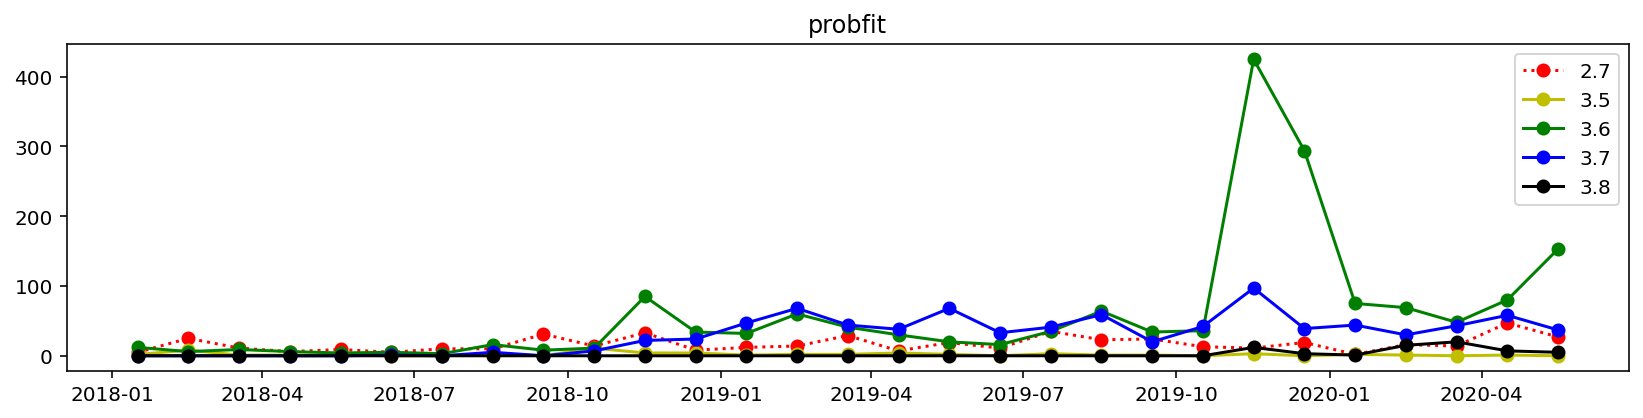

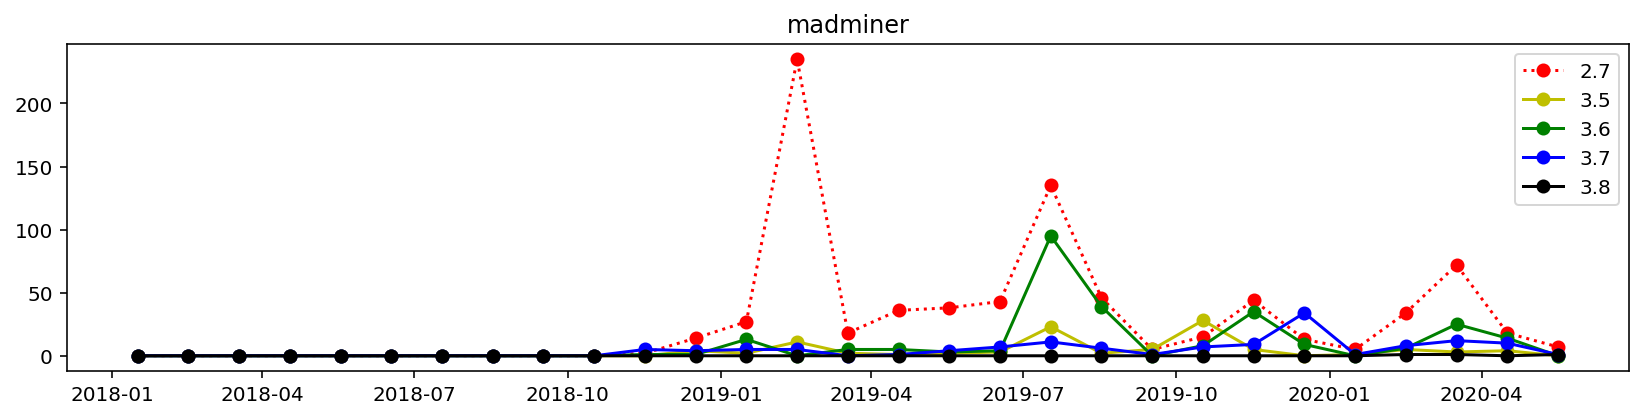

In [6]:
for package in hist.axes[0]:
    fig, ax = plt.subplots(figsize=(14,3))
    ax.set_title(package)
    for version in hist.axes[1]:
        smaller_hist = hist[bh.loc(package), bh.loc(version), :]
        centers, = smaller_hist.axes.centers
        dates = matplotlib.dates.date2num(pd.to_datetime(centers))
        ax.plot_date(dates, smaller_hist, fmt="o:" if version == 27 else "o-" , label=f"{version/10}")
    plt.legend()
    # plt.tight_layout()
    # plt.savefig(f'histogram_{package}.pdf')
    plt.show()